In [1]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Arial'
import matplotlib as mpl
import pandas as pd
import numpy as np
from iminuit import Minuit
from scipy import stats
from sympy import * 
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import os, sys
sys.path.append('../../')
from Functions import *
from ExternalFunctions import Chi2Regression, BinnedLH, UnbinnedLH, nice_string_output, add_text_to_ax

In [2]:
path = '../../../../KU/Bachelor+Research/Data/Piccaro/' # Sti til datafiler
dates = ['01052023']    # Navne på mapper med datafiler

df = read_data_picarro(path, dates)

c:\Users\nan25\OneDrive\Dokumenter\GitHub\Metal-chlorides\Bachelor\Piccaro\../..\Functions.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Seconds'] = new_df['Seconds'] - new_df['Seconds'][0]


In [3]:
for i, time in enumerate(df['01052023']['TIME']):
    if '12:55:01' in time:
        print(i, time, 'exp1')
    if '13:05:01' in time:
        print(i, time, 'exp1 light on')
    if '13:15:02' in time:
        print(i, time, 'exp1')
    if '13:25:01' in time:
        print(i, time, 'exp1 light off')
    if '13:30:01' in time:
        print(i, time, 'exp1')
    if '13:35:02' in time:
        print(i, time, 'exp1')

1810 12:55:01.280 exp1
1981 13:05:01.046 exp1 light on
2153 13:15:02.993 exp1
2324 13:25:01.344 exp1 light off
2410 13:30:01.884 exp1
2496 13:35:02.637 exp1


In [4]:
for i, time in enumerate(df['01052023']['TIME']):
    if '16:13:00' in time:
        print(i, time, 'exp2')
    if '16:23:00' in time:
        print(i, time, 'exp2 light on')
    if '16:30:01' in time:
        print(i, time, 'exp2')
    if '16:40:01' in time:
        print(i, time, 'exp2 light off')
    if '16:45:01' in time:
        print(i, time, 'exp2')
    if '16:50:01' in time:
        print(i, time, 'exp2')

5247 16:13:00.733 exp2
5421 16:23:00.447 exp2 light on
5543 16:30:01.249 exp2
5717 16:40:01.096 exp2 light off
5804 16:45:01.270 exp2
5891 16:50:01.196 exp2


In [5]:
idx_array = np.array([[1810, 1981, 2153, 2324, 2410, 2496, 5247, 5421, 5543, 5717, 5804, 5891]])
exp_keys = [['Picarro exp1 leak1', 'Picarro exp1 light', 'Picarro exp1 leak2', 'Picarro exp2 leak1', 'Picarro exp2 light', 'Picarro exp2 leak2']]
# display(df['01052023'])
pd.options.mode.chained_assignment = None 
treat_dict = dict_for_treatment(df, idx_array, exp_keys)

for key in exp_keys[0][:3]:
    treat_dict[key]['Seconds'] = treat_dict[key]['Seconds'] - df['01052023']['Seconds'][1810]
for key in exp_keys[0][3:]:
    treat_dict[key]['Seconds'] = treat_dict[key]['Seconds'] - df['01052023']['Seconds'][5247]

In [6]:
a_guess = np.zeros(6) - 0.0005
b_guess = np.zeros(6) + 100

a, b, ea, eb, Chi2, ndf, prob = fit_exp(treat_dict, a_guess, b_guess)

Picarro exp1 leak1  Fit: tau=-0.000008+-0.00002236  c_0=80.880+-0.623  p=1.000000
Picarro exp1 light  Fit: tau=-0.000010+-0.00002242  c_0=81.202+-2.747  p=1.000000
Picarro exp1 leak2  Fit: tau=-0.000015+-0.00006303  c_0=81.824+-11.608  p=1.000000
Picarro exp2 leak1  Fit: tau=-0.000008+-0.00002225  c_0=62.353+-0.478  p=1.000000
Picarro exp2 light  Fit: tau=-0.000006+-0.00002224  c_0=62.510+-1.850  p=1.000000
Picarro exp2 leak2  Fit: tau=-0.000011+-0.00006317  c_0=62.922+-8.230  p=1.000000


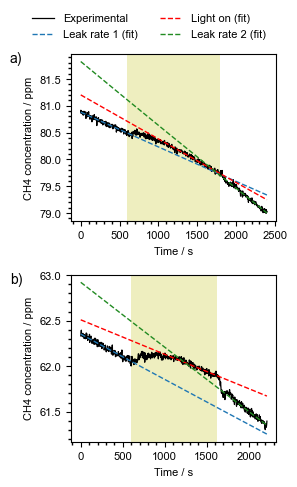

In [7]:
labels_full = ['Experimental', 'Leak rate 1 (fit)', 'Light on (fit)', 'Leak rate 2 (fit)']
fig, ax = plt.subplots(2, 1, figsize = (3.2, 5))

plot_full_exp(ax[0], df['01052023'], a[:3], b[:3], [1810, 2496], [1981, 2324])
ax[0].legend(labels = labels_full, frameon = False, fontsize = 8, ncol = 2, bbox_to_anchor = (1, 1.3))
plot_full_exp(ax[1], df['01052023'], a[3:], b[3:], [5247, 5891], [5422, 5717])

sublabels = ['a)', 'b)']
for ax, l in zip(ax.flatten(), sublabels):
    ax.text(-0.3, .95, l, transform = ax.transAxes, fontsize = 10)

fig.tight_layout()
fig.savefig('Full_exp.jpg', dpi = 600)
plt.show()

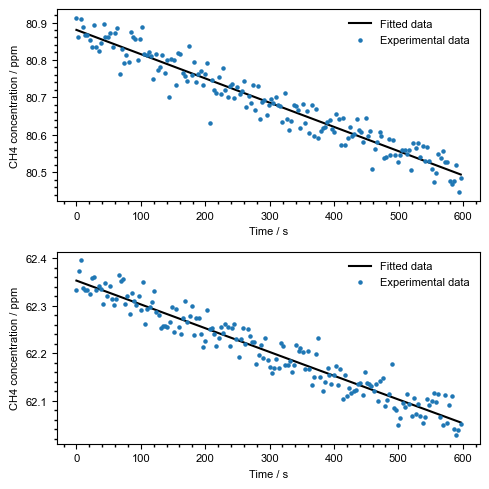

In [8]:
fig, ax = plt.subplots(2, 1, figsize = (5, 5))

plot_before_lamp(ax[0], treat_dict, a[0], b[0], 'Picarro exp1 leak1')
plot_before_lamp(ax[1], treat_dict, a[3], b[3], 'Picarro exp2 leak1')

fig.tight_layout()
fig.savefig('leak1.jpg', dpi = 600)
plt.show()

Before radiation:  79.431510801025 +- 0.05579642882755488
After radiation:  79.1747610982467 +- 0.10128339145240721
Difference:  0.2567497027782796 +- 0.04548696670993748
Before radiation:  61.325301416853975 +- 0.04284840288833358
After radiation:  61.453914735981705 +- 0.061019914921284224
Difference:  -0.12861331912772822 +- 0.018171513264164378


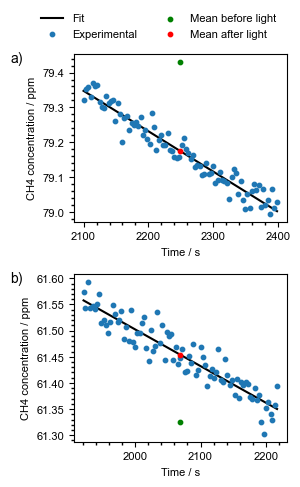

In [9]:
labels_after = ['Fit', 'Experimental', 'Mean before light', 'Mean after light']
fig, axes = plt.subplots(2, 1, figsize = (3.2, 5))

exp1_y1, exp1_ey1, exp1_y2, exp1_ey2 = plot_mean_conc(axes[0], treat_dict['Picarro exp1 leak2'], [a[0], a[2]], [b[0], b[2]])
exp2_y1, exp2_ey1, exp2_y2, exp2_ey2 = plot_mean_conc(axes[1], treat_dict['Picarro exp2 leak2'], [a[3], a[5]], [b[3], b[5]])
axes[0].legend(labels = labels_after, frameon = False, fontsize = 8, bbox_to_anchor = (1, 1.3), ncol = 2)

sublabels = ['a)', 'b)']
for ax, l in zip(axes.flatten(), sublabels):
    ax.text(-0.3, .95, l, transform = ax.transAxes, fontsize = 10)

fig.tight_layout()
fig.savefig('leak2.jpg', dpi = 600)
plt.show()